<a href="https://colab.research.google.com/github/IronVr/Machine_learning_technologies/blob/clustering/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Meta Data:
1) species: species name

2) length: length (cm)

3) weight: weight (g)

4) w_l_ratio: weight / length

In [2]:
 # Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
#from sklearn.datasets import load_wine
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [3]:
dataset = pd.read_csv('fish_data.csv')
dataset.head()

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    4080 non-null   object 
 1   length     4080 non-null   float64
 2   weight     4080 non-null   float64
 3   w_l_ratio  4080 non-null   float64
dtypes: float64(3), object(1)
memory usage: 127.6+ KB


In [5]:
vals = (dataset["species"].unique()).tolist()
vals

['Anabas testudineus',
 'Coilia dussumieri',
 'Otolithoides biauritus',
 'Otolithoides pama',
 'Pethia conchonius',
 'Polynemus paradiseus',
 'Puntius lateristriga',
 'Setipinna taty',
 'Sillaginopsis panijus']

In [6]:
print(dataset.columns[:])

Index(['species', 'length', 'weight', 'w_l_ratio'], dtype='object')


In [7]:
# сохраняем только числовые столбцы. Категориальные кодируем в числовые. Целевую переменную (если она есть) - убираем
dataset['species']= dataset['species'].replace(vals, [0, 1,2,3,4,5,6,7,8])

cols_for_cluster = ['length', 'weight', 'w_l_ratio']
df= dataset[cols_for_cluster].copy() # делаем копию, чтобы не было сюрпризов с исходным набором данных
df.head()

<ipython-input-7-b9bddd749391>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['species']= dataset['species'].replace(vals, [0, 1,2,3,4,5,6,7,8])


,length,weight,w_l_ratio
0,10.66,3.45,0.32
1,6.91,3.27,0.47
2,8.38,3.46,0.41
3,7.57,3.36,0.44
4,10.83,3.38,0.31


In [9]:
X = df
y = dataset['species']
yvals = dataset['species']

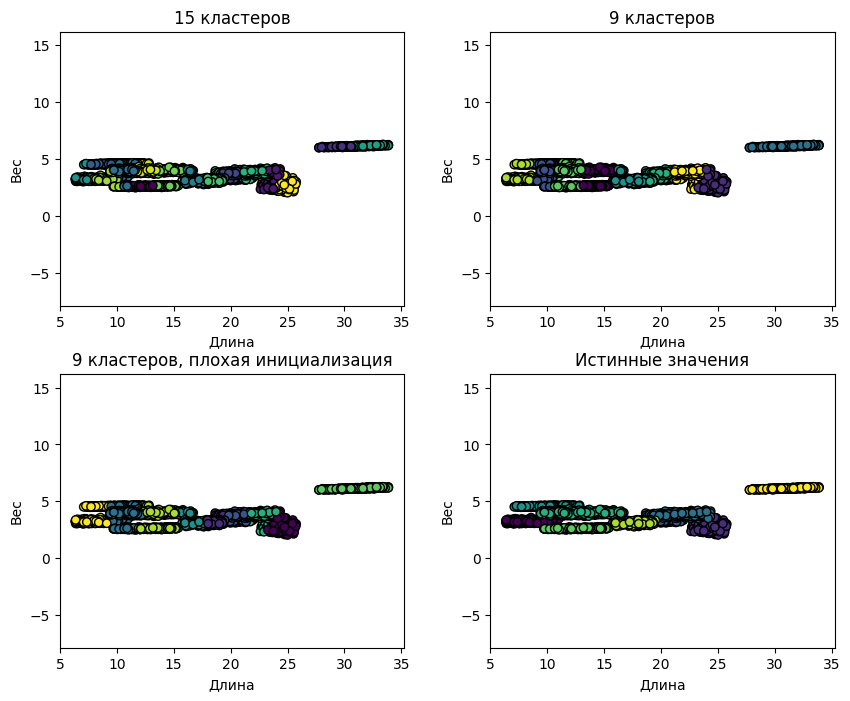

In [43]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

estimators = [
    ("k_means_iris_15", KMeans(n_clusters=15)),
    ("k_means_iris_9", KMeans(n_clusters=9)),
    ("k_means_iris_bad_init", KMeans(n_clusters=9, n_init=1, init="random")),
]

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
titles = ["15 кластеров", "9 кластеров", "9 кластеров, плохая инициализация"]

for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    est.fit(X)
    labels = est.labels_

    axs[idx // 2, idx % 2].scatter(X["length"], X["weight"], c=labels.astype(float), edgecolor="k")
    axs[idx // 2, idx % 2].set_xlabel("Длина")
    axs[idx // 2, idx % 2].set_ylabel("Масса")
    axs[idx // 2, idx % 2].set_title(title)
    axs[idx // 2, idx % 2].axis('equal')

# Плотим истинные значения
axs[1, 1].set_title("Истинные значения")
for name, label in [(vals[0], 0), (vals[1], 1), (vals[2], 2), (vals[3], 3), (vals[4], 4), (vals[5], 5), (vals[6], 6), (vals[7], 7), (vals[8], 8)]:
    ds = dataset[dataset["species"] == name]
    axs[1, 1].text(
        ds["length"].mean(),
        ds["weight"].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )

axs[1, 1].scatter(X["length"], X["weight"], c=y, edgecolor="k")

axs[1, 1].set_xlabel("Длина")
axs[1, 1].set_ylabel("Масса")
axs[1, 1].axis('equal')

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()

In [24]:
from sklearn import metrics
from sklearn.metrics.cluster import adjusted_rand_score


n_clusters = np.arange(2, 21)

In [25]:
best_metric = [0, 10000, 0,[]]

silhouette_score_values = []
adjusted_rand_score_values = []


for n in n_clusters:

    clusterer = KMeans(n_clusters=n, max_iter=10, n_init=10)
    clusterer.fit(X)
    y_pred = clusterer.predict(X)

    score1 = metrics.silhouette_score(X, y_pred)
    silhouette_score_values.append(score1)

    score2 = metrics.adjusted_rand_score(y, y_pred)
    adjusted_rand_score_values.append(score2)


    if score1 < best_metric[1] and score2 > best_metric[2]:
          best_metric[1] = score1
          best_metric[2] = score2
          best_metric[3] = clusterer.cluster_centers_
          best_metric[0] = n

In [26]:
best_metric

[8,
 0.5314507519232501,
 0.5570264715317059,
 array([[11.9327033 ,  3.55204396,  0.29848352],
        [24.1067718 ,  3.00510204,  0.12517625],
        [17.92909817,  3.1666895 ,  0.17690639],
        [31.06692308,  6.14314286,  0.19826374],
        [ 7.71183445,  3.54266219,  0.46087248],
        [21.11679487,  3.69128205,  0.17482051],
        [ 9.67075472,  4.17777778,  0.43415094],
        [14.1553288 ,  3.25995465,  0.23040816]])]

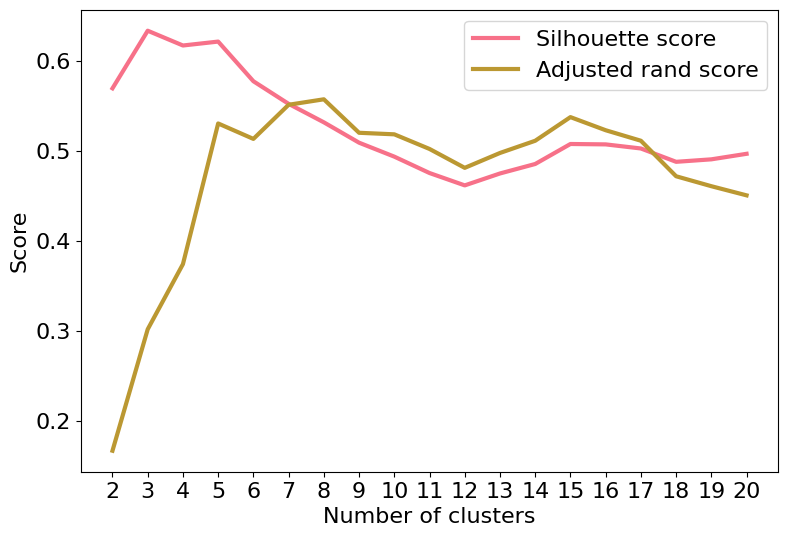

In [27]:
plt.figure(figsize=(9, 6))
plt.plot(n_clusters, silhouette_score_values, linewidth=3, label='Silhouette score')
plt.plot(n_clusters, adjusted_rand_score_values, linewidth=3, label='Adjusted rand score')
plt.xlabel('Number of clusters', size=16)
plt.ylabel('Score', size=16)
plt.xticks(n_clusters, size=16)
plt.yticks(size=16)
plt.legend(loc='best', fontsize=16)

plt.show()

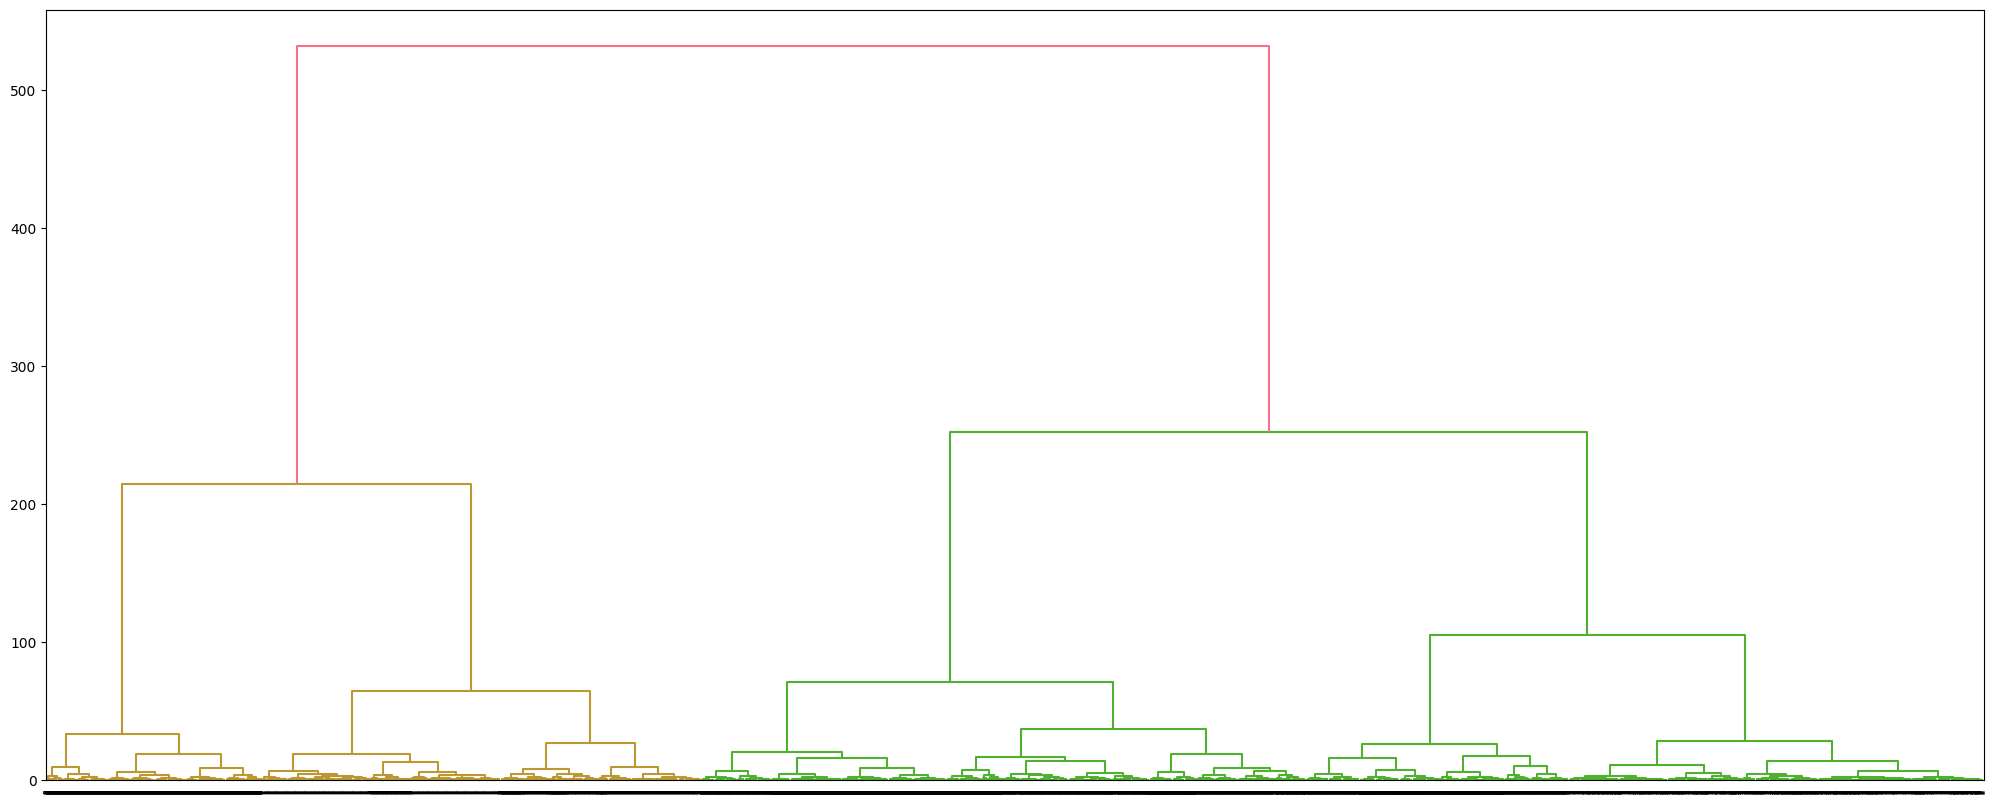

In [45]:
from scipy.cluster.hierarchy import linkage, dendrogram

samples = df.values

# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(samples, method='ward')
# попробуйте с другими методами
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

plt.figure(figsize=(25, 10))
# Строим дендрограмму, указав параметры удобные для отображения
dendrogram(mergings,
           labels=list(y),
           leaf_rotation=90,
           leaf_font_size=5,
           )

plt.show()

In [29]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [32]:
mins = X.shape[1]
db = DBSCAN(eps=0.2, min_samples=4).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

['g', 'r', 'b', 'pink', 'orange', 'yellow', 'purple', 'gray', 'lime']


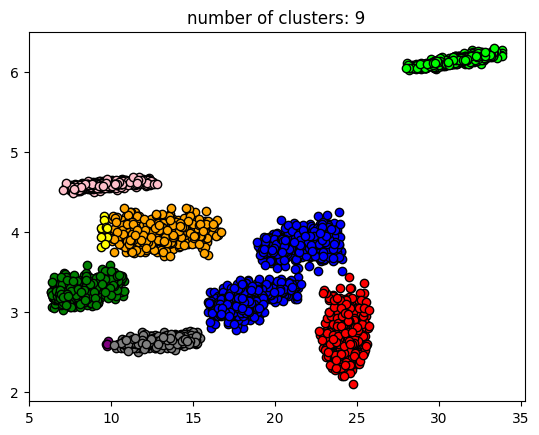

In [33]:
# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['g','r','b','pink','orange','yellow','purple','gray','lime']
print(colors)
for k, col in zip(unique_labels, colors):
	if k == -1:
		# Black used for noise.
		col = 'k'

	class_member_mask = (labels == k)

	xy = X[class_member_mask & core_samples_mask]
	plt.plot(xy["length"], xy["weight"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

	xy = X[class_member_mask & ~core_samples_mask]
	plt.plot(xy["length"], xy["weight"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()

In [ ]:
# evaluation metrics
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = adjusted_rand_score(y, labels)
print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient:0.32
Adjusted Rand Index: 0.70
